<a href="https://colab.research.google.com/github/Dotking1/Simple-things/blob/main/Copy_of_Dawg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Inputting data**

In [ ]:
import tensorflow as tf


In [ ]:
!pip install tensorflow matplotlib opencv-python pillow

In [ ]:
scam=["confirmshaming","friendspam"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_dir="/content/drive/MyDrive/train"

In [ ]:
args={"labels":"inferred","label_mode":"categorical","batch_size":6,"image_size":(256,256),"seed":1,"validation_split":.3,"class_names":scam}


In [ ]:
train=tf.keras.utils.image_dataset_from_directory(image_dir,
                                            subset="training",
                                            **args)

Found 18 files belonging to 2 classes.
Using 13 files for training.


In [ ]:
test=tf.keras.utils.image_dataset_from_directory(image_dir,
                                            subset="validation",
                                            **args)

Found 18 files belonging to 2 classes.
Using 5 files for validation.


In [ ]:
train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

  ## ***Loading data into tensor flow***

In [ ]:
first=train.take(1)
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
images,labels=list(first)[0]
first_image=images[0]

In [ ]:
first_image


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
first_image[:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

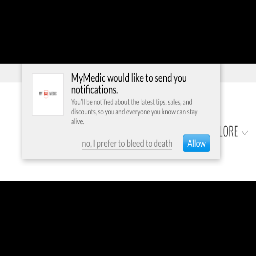

In [ ]:
from PIL import Image
Image.fromarray(images[0].numpy().astype('uint8'))


In [ ]:
labels[0]


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>

In [ ]:
train=train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

   ## **Training an initial layer**##

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model=Sequential([
      layers.Rescaling(1./255),
      layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(256,256,3)),
      layers.Flatten(),
      layers.Dense(128,activation="relu"),
      layers.Dense(len(scam))



])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [ ]:
history=model.fit(train,
                  validation_data=test,
                  epochs=8,
                  verbose=1)


Epoch 1/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.3173 - loss: 113.5825 - val_accuracy: 0.6000 - val_loss: 192.3848
Epoch 2/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4183 - loss: 149.9815 - val_accuracy: 0.6000 - val_loss: 25.9906
Epoch 3/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5817 - loss: 12.5363 - val_accuracy: 0.2000 - val_loss: 4.2657
Epoch 4/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8814 - loss: 7.9595 - val_accuracy: 0.6000 - val_loss: 45.2172
Epoch 5/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5785 - loss: 14.7064 - val_accuracy: 0.4000 - val_loss: 3.8699
Epoch 6/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8397 - loss: 0.5088 - val_accuracy: 0.6000 - val_loss: 11.0054
Epoch 7/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8990 - loss: 2.8657 - val_accuracy: 0.4000 - val_loss: 5.7373
Epoch 8/8
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9407 - loss: 0.4911 - val_accuracy: 0.4000 - val_loss: 6.4697


In [ ]:
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1048576)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │     134,217,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,655,688 (1.50 GB)

 Trainable params: 134,218,562 (512.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,437,126 (1.00 GB)

<Axes: >

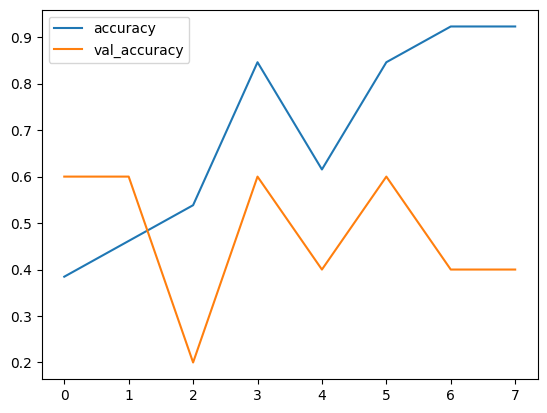

In [ ]:
import pandas as pd
history_df=pd.DataFrame.from_dict(history.history)
history_df[["accuracy","val_accuracy"]].plot()



In [ ]:
def train_model(network,epochs=6):
    model=Sequential(network)
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
    history=model.fit(train,
                  validation_data=test,
                  epochs=epochs,
    )
    history_df=pd.DataFrame.from_dict(history.history)
    ##history_df[["accuracy","val_accuracy"]].plot()
    return history_df,model


In [ ]:
network=([
      tf.keras.layers.Rescaling(1./255),
      layers.Conv2D(16,4,padding="same",activation="relu",input_shape=(256,256,3)),

      layers.MaxPooling2D(),
      layers.Conv2D(32,4,padding="same",activation="relu",input_shape=(256,256,3)),
      layers.MaxPooling2D(),
      layers.Conv2D(64,4,padding="same",activation="relu",input_shape=(256,256,3)),
      layers.MaxPooling2D(),
      layers.Dropout(.2),
      layers.Flatten(),
      layers.Dense(128,activation="relu"),
      layers.Dense(len(scam))



])
history_df,model=train_model(network)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step - accuracy: 0.4183 - loss: 1.3771 - val_accuracy: 0.6000 - val_loss: 6.6529
Epoch 2/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.4183 - loss: 5.6096 - val_accuracy: 0.6000 - val_loss: 0.6817
Epoch 3/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step - accuracy: 0.6827 - loss: 0.6334 - val_accuracy: 0.4000 - val_loss: 0.7855
Epoch 4/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.6795 - loss: 0.5441 - val_accuracy: 0.4000 - val_loss: 0.7717
Epoch 5/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - accuracy: 0.8814 - loss: 0.4435 - val_accuracy: 0.2000 - val_loss: 0.8487
Epoch 6/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 886ms/step - accuracy: 0.9407 - loss: 0.3454 - val_accuracy: 0.4000 - val_loss: 1.0962


<Axes: >

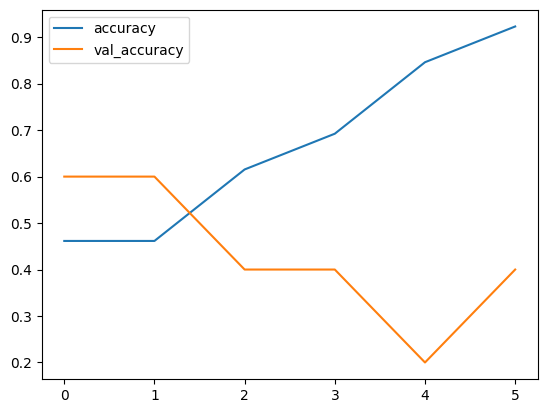

In [ ]:
history_df[["accuracy","val_accuracy"]].plot()


## **Augmenting Data**

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal",seed=1),
    layers.RandomRotation(.2,seed=1),
    layers.RandomZoom(.2,seed=1)






] )

<Axes: >

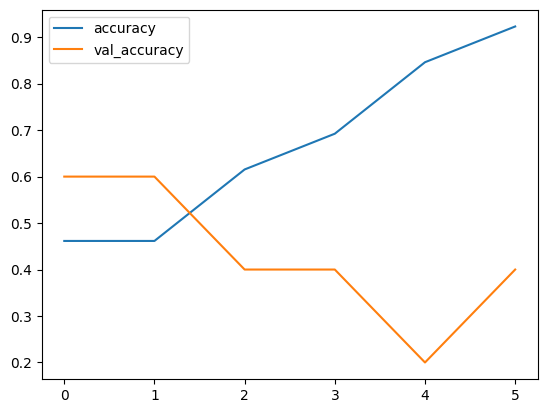

In [ ]:
history_df[["accuracy","val_accuracy"]].plot()

## **Checking for errors**

In [ ]:
preds=model.predict(test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [ ]:
preds



array([[ 1.6657337 , -0.8782337 ],
       [ 0.6236736 ,  0.2432122 ],
       [-0.46776742,  1.0663495 ],
       [-0.13389039,  0.8308891 ],
       [ 0.6395746 ,  0.33360812]], dtype=float32)

In [ ]:
import numpy as np
predicted_class=np.argmax(preds,axis=1)

In [ ]:
predicted_class


array([0, 0, 1, 1, 0])

In [ ]:
actual_labels=np.concatenate([y for x,y in test],axis=0)

In [ ]:
actual_labels


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
actual_class=np.argmax(actual_labels,axis=1)

In [ ]:
actual_class

array([1, 0, 1, 0, 1])

In [ ]:
import itertools

actual_image=[x.numpy().astype("uint8") for x,y in test]
actual_image=list(itertools.chain.from_iterable(actual_image))
actual_image=[Image.fromarray(a) for a in actual_image]


In [ ]:
#!pip install Pillow
#from PIL import Image
#actual_image=[Image.fromarray(a) for a in actual_image]
#actual_image=list

In [ ]:
pred_df=pd.DataFrame(zip(predicted_class,actual_class,actual_image),columns=["prediction","actual","image"])

In [ ]:
pred_df["prediction"]=pred_df["prediction"].apply(lambda x: scam[x])
pred_df["actual"]=pred_df["actual"].apply(lambda x:scam[x])

In [ ]:
pred_df.head()

,prediction,actual,image
0,confirmshaming,friendspam,<PIL.Image.Image image mode=RGB size=256x256 a...
1,confirmshaming,confirmshaming,<PIL.Image.Image image mode=RGB size=256x256 a...
2,friendspam,friendspam,<PIL.Image.Image image mode=RGB size=256x256 a...
3,friendspam,confirmshaming,<PIL.Image.Image image mode=RGB size=256x256 a...
4,confirmshaming,friendspam,<PIL.Image.Image image mode=RGB size=256x256 a...


,prediction,actual,image
0,confirmshaming,friendspam,
1,confirmshaming,confirmshaming,
2,friendspam,friendspam,
3,friendspam,confirmshaming,
4,confirmshaming,friendspam,

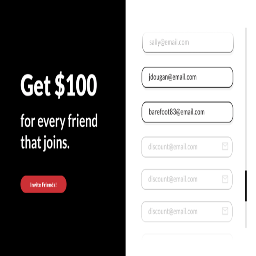
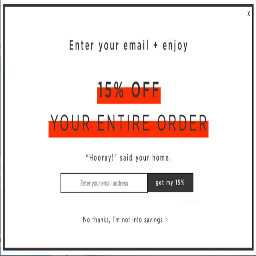
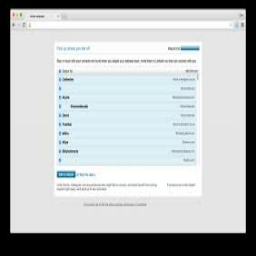
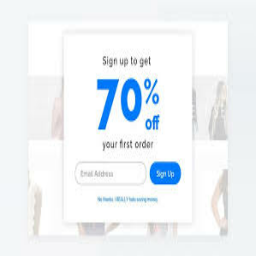
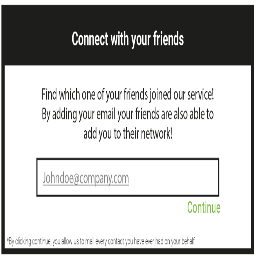

In [ ]:
import base64
import io
from PIL import Image
import cv2
import pandas as pd

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer,format='png')
        img_str=base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image':image_formatter})
#cv2.imwrite(path,img_to_save)